<a href="https://colab.research.google.com/github/PaleShineSuccess/illusionProject.py/blob/main/coffee_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cafe Wall Illusion

當前位置：

[Primrose's field](https://colab.research.google.com/drive/1XX9AR-Tgd-8aueq4m285ud_s7e4lmmHq?usp=sharing)——————[Cafe Wall Illusion]——————[Other](https://colab.research.google.com/drive/1Y1bwfP_Ind1DPlqS5dHePnJhfALpPEEi?usp=sharing)

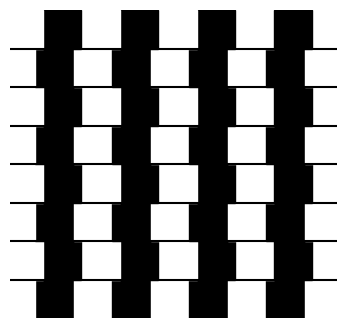

In [ ]:
# prompt: 黑白相間的方塊，每行8個，行數可用param自定義，默認為8行，上面一行不斷向右，下面一行不斷向左，一個方塊超過螢幕變化後會回到起點，每行之間有黑色線條間隔的動畫

#@title Cafe Wall Illusion復現（動畫）
#@markdown ##自定義參數
#@markdown 方塊大小，默認：20
block_size = 20 #@param {type:"slider", min:0, max:50, step:1}
#@markdown 方塊數量，默認：10
num_blocks = 10 #@param {type:"slider", min:0, max:50, step:1}
#@markdown 墻的行數，默認：8
num_rows = 8 #@param {type:"slider", min:0, max:50, step:1}
width = num_blocks * block_size
height = num_rows * block_size

# Create figure and axes
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

fig, ax = plt.subplots(figsize=(8, num_rows * 0.5))  # Adjust figsize for better visualization
ax.set_xlim(block_size+5, width-5)
ax.set_ylim(0, height)
ax.set_aspect('equal')
ax.axis('off')

# Create rectangles
rectangles = []
for row in range(num_rows):
    for i in range(num_blocks):
        color = 'black' if (i + row) % 2 == 0 else 'white'
        x = i * block_size
        y = row * block_size
        rect = plt.Rectangle((x, y), block_size, block_size, color=color)
        ax.add_patch(rect)
        rectangles.append(rect)
for i in range(1, num_rows):
    y2 = i * block_size
    line = plt.Line2D([0, width], [y2, y2], color='black')
    ax.add_line(line)
#plt.axhline(y=20, color='black', linewidth=2)

# Animation update function
def update(frame):
    for row in range(num_rows):
        #@markdown 方塊速度，默認：2
        speed =2#@param {type:"slider", min:0, max:10, step:1}
        offset = int(frame * speed)
        for i in range(num_blocks):
            rect_index = row * num_blocks + i
            rect = rectangles[rect_index]
            if row % 2 == 0:
                x = (i * block_size + offset) % width
            else:
                x = ((num_blocks - 1 - i) * block_size - offset) % width
            rect.set_x(x)
    return rectangles

# Create and display the animation
ani = animation.FuncAnimation(fig, update, frames=20, interval=50, blit=True)

HTML(ani.to_jshtml())

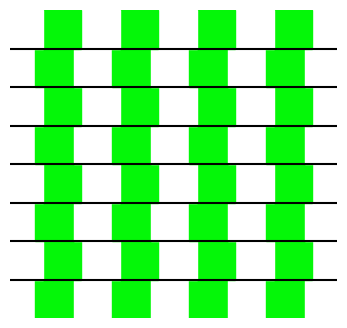

In [ ]:
# prompt: 黑白相間的方塊，每行8個，行數可用param自定義，默認為8行，上面一行不斷向右，下面一行不斷向左，一個方塊超過螢幕變化後會回到起點，每行之間有黑色線條間隔的動畫

#@title Cafe Wall Illusion延伸（動畫）
#@markdown 試著將方塊換顏色，看看其錯覺效果是否仍存在

#@markdown 方塊大小，默認：20
block_size = 20  #@param {type:"slider", min:0, max:50, step:1}
#@markdown 方塊數量，默認：10
num_blocks = 10  #@param {type:"slider", min:0, max:50, step:1}
#@markdown 行數，默認：8
num_rows = 8 #@param {type:"slider", min:0, max:50, step:1}
width = num_blocks * block_size
height = num_rows * block_size

# Create figure and axes
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import random

fig, ax = plt.subplots(figsize=(8, num_rows * 0.5))  # Adjust figsize for better visualization
ax.set_xlim(block_size+5, width-5)
ax.set_ylim(0, height)
ax.set_aspect('equal')
ax.axis('off')
# Rainbow colors
rainbow_colors = [
    (1, 0, 0),  # Red
    (1, 0.5, 0),  # Orange
    (1, 1, 0),  # Yellow
    (0, 1, 0),  # Green
    (0, 0, 1),  # Blue
    (0.5, 0, 1), # Indigo
    (1, 0, 1)   # Violet
]

# Randomly select two colors
color1 = random.choice(rainbow_colors)
color2 = random.choice(rainbow_colors)

# Color transition factor
color_transition_factor = 0

# Create rectangles
rectangles = []
for row in range(num_rows):
    for i in range(num_blocks):
        color = 'black' if (i + row) % 2 == 0 else 'white'
        x = i * block_size
        y = row * block_size
        rect = plt.Rectangle((x, y), block_size, block_size, color=color)
        ax.add_patch(rect)
        rectangles.append(rect)

# Add separators (black lines between rows)
for i in range(1, num_rows):
    y2 = i * block_size
    line = plt.Line2D([0, width], [y2, y2], color='black')
    ax.add_line(line)

# Animation update function
def update(frame):
    global color_transition_factor

    color_transition_factor = (color_transition_factor + 0.01) % 1  # Update factor, wraps around 1

    for row in range(num_rows):
        #@markdown 方塊速度，默認：2
        speed =2#@param {type:"slider", min:0, max:10, step:1}
        offset = int(frame * speed)  # Adjust speed by changing the multiplier
        for i in range(num_blocks):
            rect_index = row * num_blocks + i
            rect = rectangles[rect_index]

            # Smooth color transition for black squares
            if (i + row) % 2 == 0:
                # Interpolate between color1 and color2
                new_color = tuple(
                    color1[j] + color_transition_factor * (color2[j] - color1[j])
                    for j in range(3)
                )
                rect.set_color(new_color)

            # Update rectangle position for movement
            if row % 2 == 0:
                x = (i * block_size + offset) % width
            else:
                x = ((num_blocks - 1 - i) * block_size - offset) % width
            rect.set_x(x)
    return rectangles
#@markdown 顏色太多了，弄選項麻煩，就不調了

# Create and display the animation
ani = animation.FuncAnimation(fig, update, frames=100, interval=50, blit=True)

HTML(ani.to_jshtml())

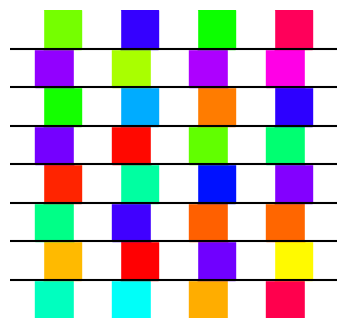

In [ ]:
# Parameters
#@title Cafe Wall Illusion延伸二（動畫）
#@markdown 觀察到顏色統一的方塊依然有錯覺效果，進一步測試每個方塊都不同顏色

#@markdown 方塊大小，默認：20
block_size = 20  #@param {type:"slider", min:0, max:50, step:1}
#@markdown 方塊數量，默認：10
num_blocks = 10  #@param {type:"slider", min:0, max:50, step:1}
#@markdown 行數，默認：8
num_rows = 8 #@param {type:"slider", min:0, max:50, step:1}
width = num_blocks * block_size
height = num_rows * block_size

# Create figure and axes
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import colorsys

fig, ax = plt.subplots(figsize=(8, num_rows * 0.5))  # Adjust figsize for better visualization
ax.set_xlim(block_size+5, width-5)
ax.set_ylim(0, height)
ax.set_aspect('equal')
ax.axis('off')

# Store current colors for each black square
current_hues = {  # Store the hue for color interpolation
    (row, i): np.random.rand()  # Random initial hue for each black square
    for row in range(num_rows)
    for i in range(num_blocks)
    if (i + row) % 2 == 0  # Only for black squares
}

# Create rectangles
rectangles = []
for row in range(num_rows):
    for i in range(num_blocks):
        color = 'black' if (i + row) % 2 == 0 else 'white'
        x = i * block_size
        y = row * block_size
        rect = plt.Rectangle((x, y), block_size, block_size, color=color)
        ax.add_patch(rect)
        rectangles.append(rect)

# Add separators (black lines between rows)
for i in range(1, num_rows):
    y2 = i * block_size
    line = plt.Line2D([0, width], [y2, y2], color='black')
    ax.add_line(line)

# Helper function to convert HSV to RGB with high saturation and brightness
def hsv_to_rgb(hue):
    return colorsys.hsv_to_rgb(hue, 1, 1)

# Animation update function
def update(frame):
    for row in range(num_rows):
        offset = int(frame * 2)  # Adjust speed by changing the multiplier
        for i in range(num_blocks):
            rect_index = row * num_blocks + i
            rect = rectangles[rect_index]

            # Smooth color transition for black squares
            if (i + row) % 2 == 0:
                # Update hue for color cycling
                current_hues[(row, i)] = (current_hues[(row, i)] + 0.01) % 1  # Increment hue
                new_color = hsv_to_rgb(current_hues[(row, i)])  # Convert hue to RGB
                rect.set_color(new_color)

            # Update rectangle position for movement
            if row % 2 == 0:
                x = (i * block_size + offset) % width
            else:
                x = ((num_blocks - 1 - i) * block_size - offset) % width
            rect.set_x(x)
    return rectangles

# Create and display the animation
ani = animation.FuncAnimation(fig, update, frames=100, interval=50, blit=True)

HTML(ani.to_jshtml())


當前位置：

[Primrose's field](https://colab.research.google.com/drive/1XX9AR-Tgd-8aueq4m285ud_s7e4lmmHq?usp=sharing)——————[Cafe Wall Illusion]——————[Other](https://colab.research.google.com/drive/1Y1bwfP_Ind1DPlqS5dHePnJhfALpPEEi?usp=sharing)